# importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data_Source/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Descriptive statistics

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Pre-processing

In [6]:
df.shape

(150, 6)

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Data Types are correct according to there characters

In [9]:
# df.isnull().value_counts()

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We don't have any null values

In [10]:
## Renaming my columns name
df.rename(columns={'SepalLengthCm':'sepallength','SepalWidthCm':'sepalwidth','PetalLengthCm':'petallength','PetalWidthCm':'petalwidth'},inplace=True)

In [11]:
df.head()

,Id,sepallength,sepalwidth,petallength,petalwidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA ANALYSIS

In [12]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

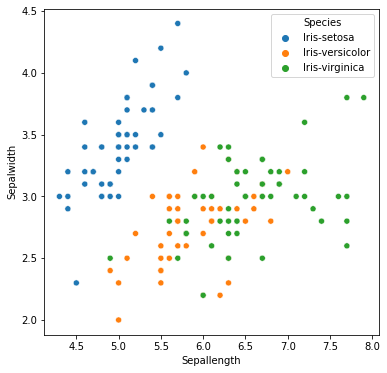

In [13]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'sepallength', y = 'sepalwidth',hue = 'Species', data = df)
plt.xlabel('Sepallength')
plt.ylabel('Sepalwidth')
plt.show()

## From the above scatter plot, we can note some interesting points
#### * Iris setosa are more in width than sepal length
#### * Iris Versicolor and Virginica are correlated to each other with respect to length and width of sepal

In [14]:
df.drop(columns = ['Id'], inplace = True)

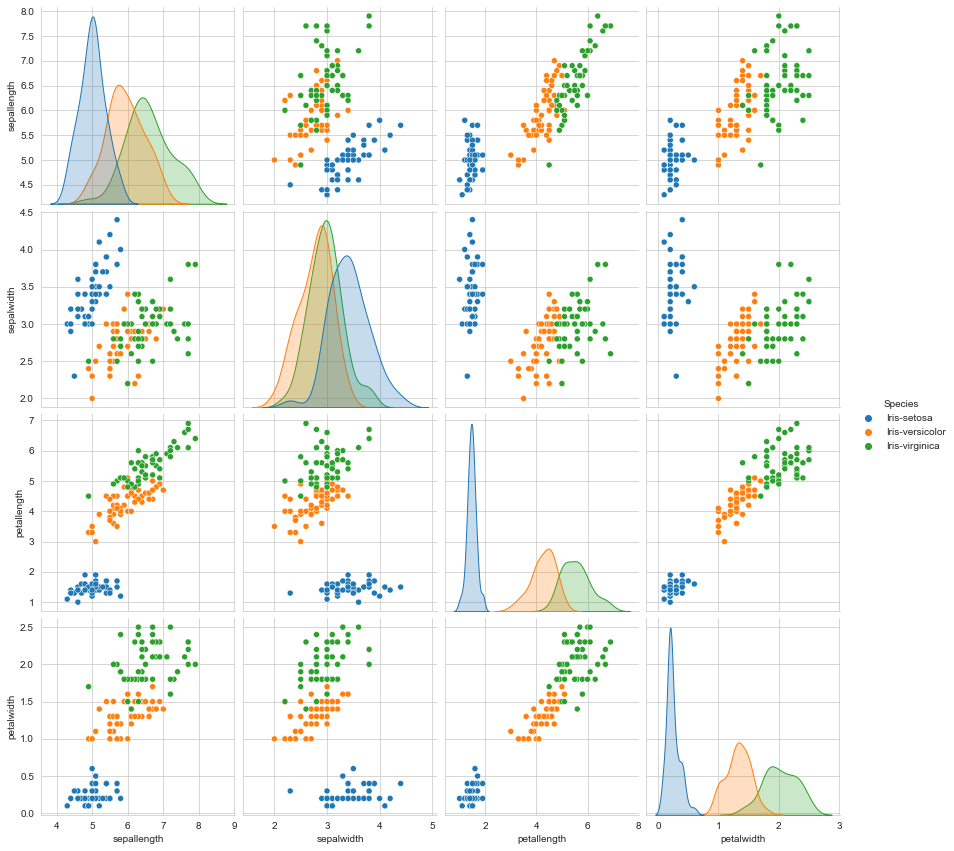

In [15]:
sns.set_style("whitegrid");
sns.pairplot(df,hue="Species",height=3);
plt.show()

1) petal_length and petal_width are the most useful features to identify various flower types.

2) While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).

3) We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

### Let's identify how to classify between Virnica and Verscilor species

In [16]:
iris_setosa = df.loc[df["Species"]=="Iris-setosa"];
iris_virginica = df.loc[df["Species"]=="Iris-virginica"];
iris_versicolor = df.loc[df["Species"]=="Iris-versicolor"]

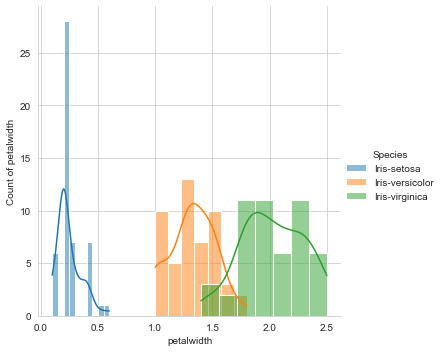

In [44]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df, hue="Species",height=5)
g.map(sns.histplot,"petalwidth", kde = True)
g.add_legend();
plt.ylabel('Count of petalwidth')
plt.show()

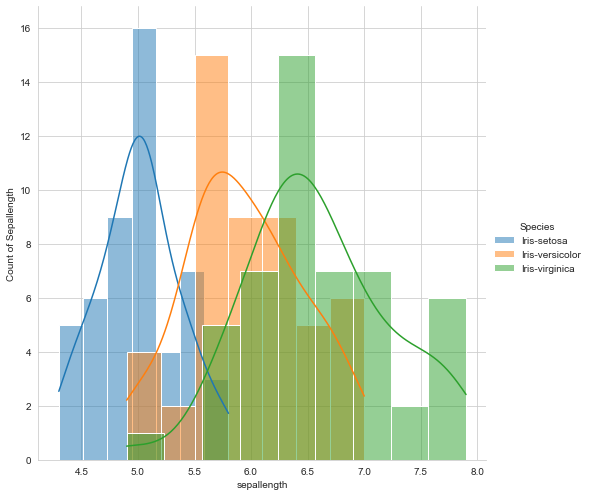

In [46]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df, hue="Species",height=7)
g.map(sns.histplot,"sepallength", kde = True)
g.add_legend();
plt.ylabel('Count of Sepallength')
plt.show()

From the above figure, we can see that Sepal length cannot distinguish between  different species, 
So we should not consider sepallength to classify the species

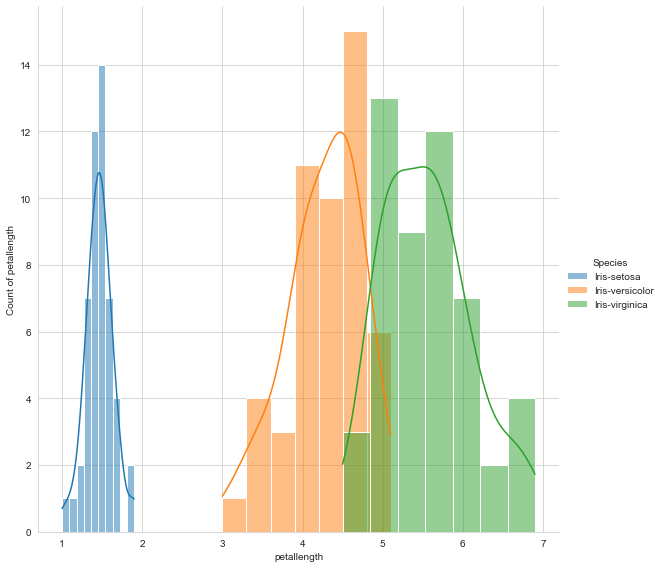

In [51]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df, hue="Species",height=8)
g.map(sns.histplot,"petallength", kde = True)
g.add_legend()
plt.ylabel('Count of petallength')
plt.show()

From the above figure, we can see that Petal length can distinguish between different species,
So we can consider  to classify the species

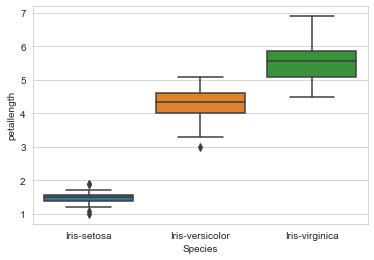

In [52]:
# Box Plot

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Species',y='petallength', data=df)
plt.show()

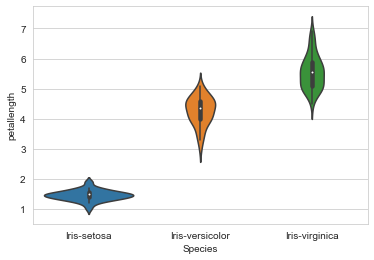

In [53]:
#Violen plot
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="Species", y="petallength", data=df, height=8)
plt.show()